In [1]:
### Importing the data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
df1 = pd.read_csv("./marketing_customer_analysis.csv")
display(df1.head())
df1.shape

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


(10910, 26)

In [2]:
### Standarizing header names 

df1.columns = list(map(lambda x: x.lower(), df1.columns))
df1.head()
df1 = df1.iloc[:,1:]
df1.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [3]:
### Dealing with NaNs

nan_columns = ["state", "months since last claim", "vehicle class"]

for column in nan_columns:
    df1 = df1[df1[column].isna() == False]

print(df1.isna().sum())
print(df1.shape)

df1['vehicle type'] = df1['vehicle type'].fillna("A")
print(df1['vehicle type'].unique())


customer                            0
state                               0
customer lifetime value             0
response                            0
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim             0
months since policy inception       0
number of open complaints           0
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                       0
vehicle size                        0
vehicle type                     4591
dtype: int64
(9134, 25)
['A']


In [4]:
### Date time format 

df1["effective to date"] = pd.to_datetime(df1["effective to date"], errors = "coerce")
print(df1.dtypes)
display(df1.head())
print(df1.shape)

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,A


(9134, 25)


In [5]:
df1["month"] = pd.DataFrame(map(lambda x: x.month, df1["effective to date"]))
display(df1.head())
print(df1.dtypes)
print(df1["month"].value_counts())
print(df1.shape)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2.0
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1.0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2.0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1.0
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,A,1.0


customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [6]:
def clean_month(x):
    if x == 1.0:
        return "January"
    elif x == 2.0:
        return  "February"


df1["month"] = list(map(clean_month, df1["month"]))
print(df1["month"].value_counts())
print(df1.shape)

January     4105
February    3516
Name: month, dtype: int64
(9134, 26)


In [7]:
### Describing dataframe 

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly premium auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer lifetime value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly premium auto           9134 non-null   int64  
 3   months since last claim        9134 non-null   float64
 4   months since policy inception  9134 non-null   int64  
 5   number of open complaints      9134 non-null   float64
 6   number of policies             9134 non-null   int64  
 7   total claim amount             9134 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 642.2 KB
None


Text(0.5, 1.0, 'Total claim amount')

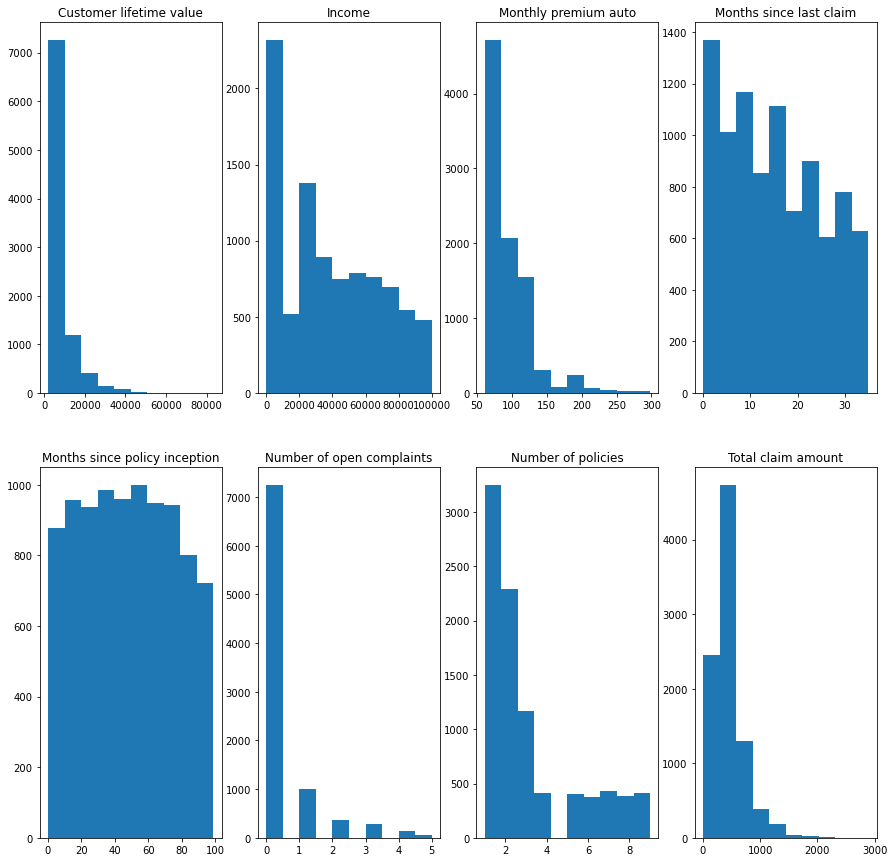

In [8]:
### Dividing data into numerical and categorical and checking out the distribution

numerical = df1.select_dtypes('number')
print(numerical.info())

fig, ax = plt.subplots(2,4, figsize=(15,15))
ax[0,0].hist(numerical["customer lifetime value"])
ax[0,0].set_title("Customer lifetime value")
ax[0,1].hist(numerical["income"])
ax[0,1].set_title("Income")
ax[0,2].hist(numerical["monthly premium auto"])
ax[0,2].set_title("Monthly premium auto")
ax[0,3].hist(numerical["months since last claim"])
ax[0,3].set_title("Months since last claim")
ax[1,0].hist(numerical["months since policy inception"])
ax[1,0].set_title("Months since policy inception")
ax[1,1].hist(numerical["number of open complaints"])
ax[1,1].set_title("Number of open complaints")
ax[1,2].hist(numerical["number of policies"])
ax[1,2].set_title("Number of policies")
ax[1,3].hist(numerical["total claim amount"])
ax[1,3].set_title("Total claim amount")

### It seems that the columns "total claim amount" and "customer lifetime value" have a 
### skewed distribution. We will transform them and see whether that way we can obtain a more
### normal-like distribution

<AxesSubplot:>

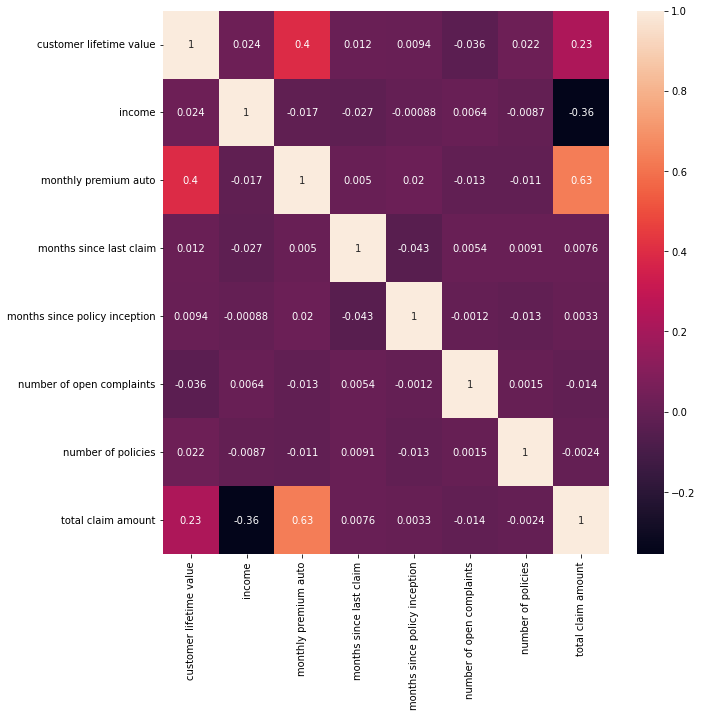

In [9]:
### Show correlation matrix 

corr = df1.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(df1.corr(), annot = True)


In [10]:
### Erase columns "months since last claim", "months since policy inception", 
###"number of open complaints" and "number of policies"

numerical = numerical.loc[:, ["customer lifetime value", "income", "monthly premium auto", 
                             "total claim amount"]]

In [11]:
### Now we will transform the categorical data into numeric variables and then join the
### numerical and categorical dataframes 

categorical = df1.select_dtypes("object")
categorical
categorical = categorical.drop(["customer", "vehicle type", "month"], axis = 1)
categorical
categorical = pd.get_dummies(categorical, categorical.columns, drop_first=True)
categorical
categorical.shape
numerical = pd.concat([numerical, categorical], axis = 1)
numerical.shape

(9134, 47)

In [12]:
### X,y split

y = numerical["total claim amount"]
x = numerical.drop(["total claim amount"], axis = 1)

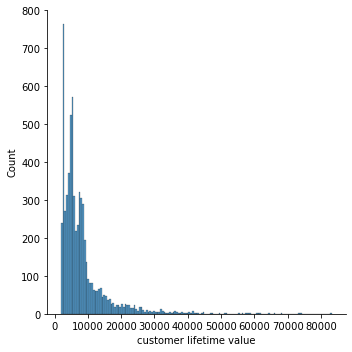

In [13]:
### Train-test split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 50)
sns.displot(x_train['customer lifetime value'])

### I need to transform the customer lifetime value column in the x_train and x_test 

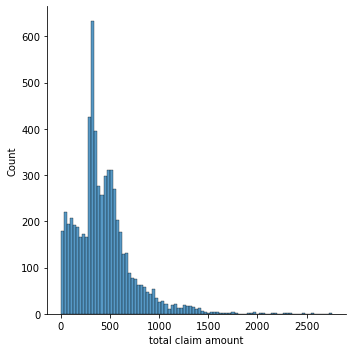

In [14]:
sns.displot(y_train)

### Also the y_train and y_test data 

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

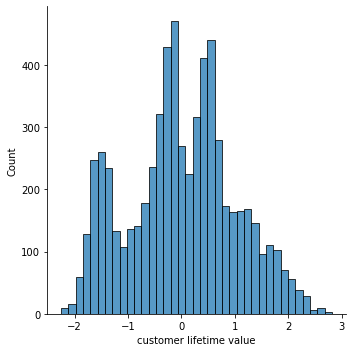

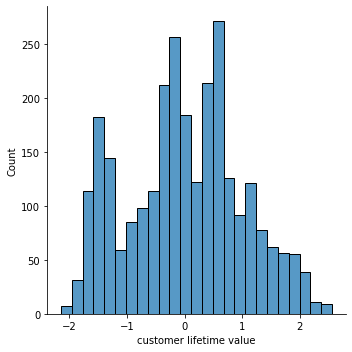

In [15]:
### Here I transform the customer lifetime value columns in the x_train and x_test dataset. I dont think the other 
### columns need to be transformed 

pt = PowerTransformer()
x_train_pt = x_train.copy()
pt.fit(x_train_pt[['customer lifetime value']])
x_train_pt['customer lifetime value'] = pt.transform(x_train_pt[['customer lifetime value']])

x_test_pt = x_test.copy()
pt.fit(x_test_pt[['customer lifetime value']])
x_test_pt['customer lifetime value'] = pt.transform(x_test_pt[['customer lifetime value']])

sns.displot(x_train_pt['customer lifetime value'])
sns.displot(x_test_pt['customer lifetime value'])


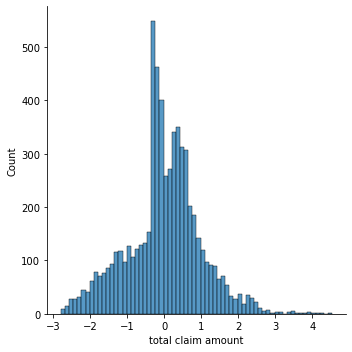

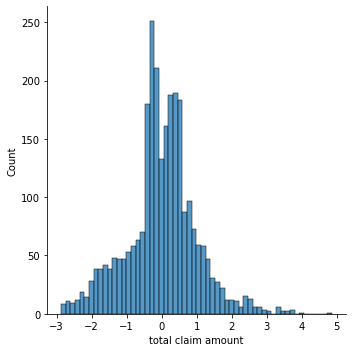

In [16]:
### Here I transform the y_train and y_test

y_train_pt = y_train.copy()
pt.fit(y_train_pt[['total claim amount']])
y_train_pt['total claim amount'] = pt.transform(y_train_pt[['total claim amount']])

y_test_pt = y_test.copy()
pt.fit(y_test_pt[['total claim amount']])
y_test_pt['total claim amount'] = pt.transform(y_test_pt[['total claim amount']])

sns.displot(y_train_pt['total claim amount'])
sns.displot(y_test_pt['total claim amount'])


In [17]:
### Now I am normalizing the x_train_pt and x_test_pt data 

transformer = MinMaxScaler().fit(x_train_pt)
x_train_pt_norm = transformer.transform(x_train_pt)
x_train_pt_norm = pd.DataFrame(x_train_pt_norm, columns=x_train_pt.columns)
x_train_pt_norm

,customer lifetime value,income,monthly premium auto,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
0,0.709389,0.492234,0.172996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.447821,0.941329,0.054852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.182876,0.368510,0.050633,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.367652,0.581000,0.240506,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.432002,0.530881,0.050633,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,0.521653,0.523579,0.016878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6389,0.361557,0.225753,0.008439,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6390,0.477433,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6391,0.513321,0.615957,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
transformer = MinMaxScaler().fit(x_test_pt)
x_test_pt_norm = transformer.transform(x_test_pt)
x_test_pt_norm = pd.DataFrame(x_test_pt_norm, columns=x_test_pt.columns)
x_test_pt_norm

,customer lifetime value,income,monthly premium auto,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,...,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
0,0.868174,0.000000,0.217021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.385390,0.000000,0.046809,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.571283,0.420618,0.178723,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.545136,0.000000,0.187234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.290562,0.000000,0.204255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,0.394390,0.216937,0.280851,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2737,0.635442,0.648509,0.289362,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2738,0.587277,0.838796,0.055319,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2739,0.092526,0.000000,0.008511,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
### Now I am applying the linear regression model

lm = LinearRegression()
lm.fit(x_train_pt_norm, y_train_pt["total claim amount"])
y_pred_train_pt = lm.predict(x_train_pt_norm)
y_pred_test_pt = lm.predict(x_test_pt_norm)
y_pred_train_pt = lm.predict(x_train_pt_norm)
y_pred_test_pt = lm.predict(x_test_pt_norm)
y_pred_train = pt.inverse_transform(pd.DataFrame(y_pred_train_pt, columns = ["total claim amount"]))
y_pred_test = pt.inverse_transform(pd.DataFrame(y_pred_test_pt, columns = ["total claim amount"]))
r2_train = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred_test, y_test)
mse_train = mean_squared_error(y_pred_train, y_train)
mse_test = mean_squared_error(y_pred_test, y_test)
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_test, y_test)
mape_train = mean_absolute_percentage_error(y_pred_train, y_train)
mape_test = mean_absolute_percentage_error(y_pred_test, y_test)

print("R2 score of trained dataset is", r2_train)
print("R2 score of test dataset is", r2_test)
print("Mean squared error of trained dataset is", mse_train)
print("Mean squared error of test dataset is", mse_test)
print("Mean absolute error of train dataset is", mae_train)
print("Mean absolute error of test dataset is", mae_test)
print("Mean absolute percentage error of train dataset is", mape_train)
print("Mean absolute percentage error of test dataset is", mape_test)
print(lm.intercept_)
print(lm.coef_)


R2 score of trained dataset is 0.7210795765481768
R2 score of test dataset is 0.7101597877592278
Mean squared error of trained dataset is 16501.15319519624
Mean squared error of test dataset is 16664.762423272758
Mean absolute error of train dataset is 85.51512595484712
Mean absolute error of test dataset is 85.18083648866155
Mean absolute percentage error of train dataset is 0.2573222754257799
Mean absolute percentage error of test dataset is 0.2451721547637356
-1.8672114161472
[ 5.41253546e-02 -8.72491346e-02  3.07403062e+00  7.08964112e-03
 -5.69963155e-03 -1.41575881e-02  2.20437248e-02 -4.74467295e-02
  2.55151868e-02  6.25651150e-02 -2.52625777e-02 -2.61511928e-02
  4.81352528e-02 -9.99074556e-03  1.70457039e-03  5.80729703e-02
 -8.95889911e-03  1.90009089e-01  4.21032334e-02  1.72934094e+00
  1.18676484e+00 -2.16073435e-02  1.64587981e-01  1.43346082e-03
  4.93986107e-02 -3.06069380e-02 -2.74485837e-02  1.68103408e-02
 -1.12048712e-02 -4.17200873e-03  9.73816571e-02 -5.04399127e

Text(0.5, 1.0, 'Linear Regresssion Model MCA')

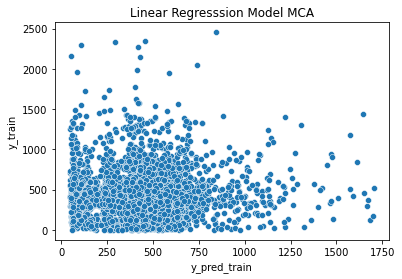

In [71]:
y_pred_train = pd.DataFrame(y_pred_train, columns = ["total claim amount"])
data = pd.concat([y_pred_train, y_train], axis = 1)
data.columns = ["y_pred_train", "y_train"]
data
sns.scatterplot(data=data, x = "y_pred_train", y = "y_train")
plt.xlabel('y_pred_train')
plt.ylabel('y_train')
plt.title('Linear Regresssion Model MCA')

In [65]:
### Facit: The model does not seem to predict the data too well. Maybe because there are 
### very few numerical columns that are highly correlated with the predicted column?